# Сборный проект: Исследование данных о продажи игр


В нашем распоряжении данные из открытых источников о продажи, оценки пользователей и экспертов, жанры и платформы. Нам нужно выявить определяющие успешность игры и их закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

# План работы:

1. Открытие файла и изучение общей информации
2. Подготовка данных
3. Проведем исследовательский анализ данных
4. Составим портрет пользователя для каждого региона
5. Проверим гипотезы
6. Общий вывод

## Откроем файл с данными и изучите общую информацию

### Импорт необходимых библиотек

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from scipy import stats as st
pd.set_option('display.max_columns', None) # опция для вывода всех колонок 

### Считаем данные из csv-файла в датафрейм и сохрани в переменную data

In [2]:
data = pd.read_csv('/datasets/games.csv')

 ### Вывод первых 5 строчек датафрейма data на экран

In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Вывод основной информации о датафрейме с помощью метода info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Построение общой гистограммы для всех столбцов таблицы

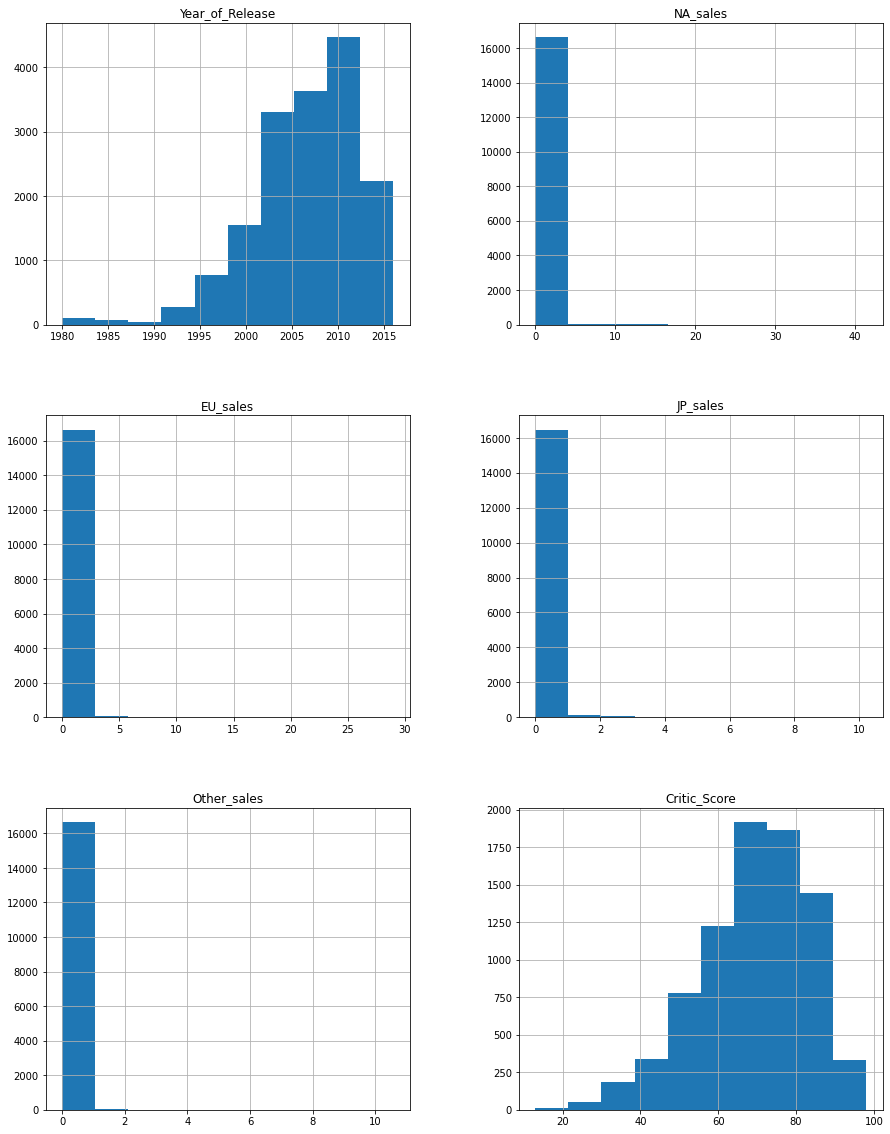

In [5]:
data.hist(figsize=(15, 20))
plt.show()

## Подготовка данных

### Обработка столбцов

Вывод на экран всех столбцов

In [6]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Приведение все колонок к нижнему регистру

In [7]:
data.columns = data.columns.str.lower()

In [8]:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

**Вывод:** для удобства работы с таблицей, приводим все колонки к одному стандарту

### Найдем пропущенные значения и заполним их при необходимости

Вывод на экран количество пропусков

In [9]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Проверка столбца "name"

In [10]:
data[data['name'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


**Вывод:** Нет смысла оставлять эти две строки в таблице, они не несут ни какой ценности для дальнейшего анализа

In [11]:
data = data.dropna(subset = ['name'])

In [12]:
data['name'].isnull().sum()

0

#### Проверка столба "year_of_release"

In [13]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Предположим, что одна игра на разных приставках вышла в один год. По такой гипотезе и заполним этот столбец.

In [14]:
data['year_of_release'] = data.groupby('name')['year_of_release'].transform(lambda x: x.ffill().bfill())

In [15]:
data['year_of_release'].isnull().sum()

146

Проверим оставшие значения

In [16]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


**Вывод:** Мы восстановили почти половину данных столбца "year_of_release" за счет данных об игре на других приставках. Остывшие данные восстановить не представится возможным так на игры не проставлены даны о дате релизы на всех приставках.

#### Проверка столба "critic_score"

In [17]:
data[data['critic_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Возьмём средний рейтинг игр на разных приставках и внесем значение где это возможно

In [18]:
data['critic_score'] = data.groupby('name')['critic_score'].transform(lambda x: x.fillna(x.mean()))

In [19]:
data['critic_score'].isnull().sum()

7615

**Вывод:** Не так уж и много получилось заполнить этим методом. Остальные значения пока изменять и удалять не будет, т.к. их слишком большое количество и может повлиять на окончательный исход.

#### Проверка столба "user_score"

In [20]:
data[data['user_score'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце присутствует значении "tbd". "tbd" - обозначает еще не определено значение или будет определено позже. Предположим, что это не рассчитанный рейтинг. Просто заменим его на nan.

In [22]:
data.loc[data.user_score=='tbd', 'user_score'] = np.nan

In [23]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Прежде чем обработать данные, нужно изменить тип данных

In [24]:
data['user_score'] = data['user_score'].astype('float')

Возьмём средний рейтинг игр на разных приставках и внесем значение где это возможно

In [25]:
data['user_score'] = data.groupby('name')['user_score'].transform(lambda x: x.fillna(x.mean()))

In [26]:
data['user_score'].isnull().sum()

8024

В итоге пропущенных значений увеличелось после замены 'tbd' на nan

#### Проверка столба "rating"

В столбце "rating" записана возрастная категория игр от ESRB. Рейтинги ESRB действительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Но в таблице данные с разных локаций, поэтому пропуски очевидны.

In [27]:
data[data['rating'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


В столбце много пропусков, предположим, что рейтинг еще не определен и будет определен позднее. Т.к. столбец категориальный, будет лучше заменить пропуски на какое-то значение, возьмём к примеру "tbd".

In [28]:
data['rating'] = data['rating'].fillna('tbd')

In [29]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,tbd
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,NaN,E
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,NaN,E10+
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,tbd
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,tbd


**Вывод:**в категориальных данных лучше не оставлять пропуски, а создать универсальное значение. Т.к. может повлиять на дальнейшее исследование.

#### Причины пропусков

Причины пропусков могут быть разные выделим несколько предположений:

Информация собиралась из открытых источник, возможно не было полной информации, либо она была в формате, не позволяющем корректно выгрузить данные, т.к. вероятнее всего информация выгружалась автоматическим сборщиком. Пропуски в наименование игр, возможна из-за невозможности перекодирования названия в латиницу. На отсутствие оценок могло повлиять все, что было сказано ранее или фактически отсутствия их, из-за мало популярности игры или игры из прошлого. Причиной отсутствие рейтинговой оценки ESRB, могла быть не желание издателя выводить игру на рынок Северной Америки, а создавалась только для Японии. В Японии, этот рейтинг не влияет на продажи.

### Изменение типов данных

Рассмотрим информацию о таблица и определим каким столбцам требуется замена данных

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       8689 non-null   float64
 10  rating           16713 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


Из информации видим, замена типов данных нужна для столбе "year_of_release". В этом столбце записаны года выхода игра, числа целые по этому есть смысл изменить типы данных на int. Для ускорее работы с таблицой.

#### Работа с столбцом "year_of_release"

При обработки столбца ранее было обнаружены пропущенные значения, заменим их на 0 для измениня типов данных

In [31]:
data['year_of_release'] = data['year_of_release'].fillna(0)

In [32]:
data[data['year_of_release'].isnull()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Теперь мы можем изменить тип данных

In [33]:
data['year_of_release'] = data['year_of_release'].astype('int')

Расмотрим результат на графике

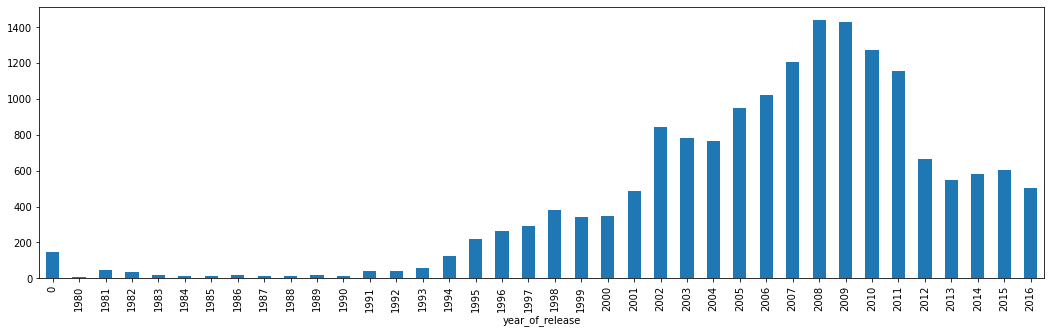

In [34]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(18,5))
plt.show()

### Подсчет суммарных продаж во всех регионах и запишем в отдельный столбец.

In [35]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [36]:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,tbd,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,tbd,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,tbd,28.31


## Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы

In [37]:
data['year_of_release'].value_counts()

2008    1441
2009    1430
2010    1271
2007    1202
2011    1153
2006    1020
2005     947
2002     845
2003     784
2004     764
2012     662
2015     606
2014     582
2013     547
2016     502
2001     485
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
0        146
1994     122
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1985      14
1984      14
1980       9
Name: year_of_release, dtype: int64

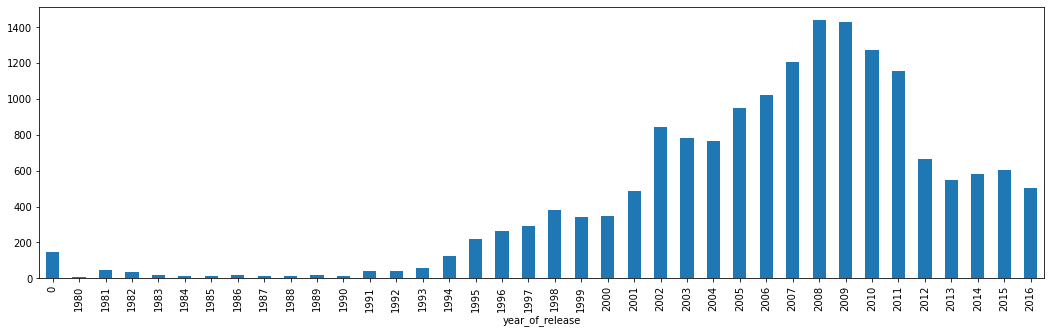

In [38]:
data.groupby('year_of_release')['year_of_release'].count().plot(kind='bar', figsize=(18,5))
plt.show()

**Вывод:** Больше всего игр было выпущено в 2008 и 2009 годах. А меньше всего в 1980. Резкий спад выхода игр пришелся на 2012 год, скорее всего повлиял экономически кризис в мире. Игры с неизвестным годом релиза будут мешать статистике. Количество игр без даты составляет менее 1%, на исследование никак не повлияет.

Удоление игр без даты релиза из таблицы.

In [39]:
data = data.query('year_of_release >= 1980')

### Рассмотрим как менялись продажи по платформам

#### Построим рейтинг платформ всех времен

In [40]:
data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False)

platform
PS2     1247.16
X360     966.61
PS3      935.19
Wii      903.31
DS       804.28
PS       727.58
PS4      314.14
GBA      313.73
PSP      293.57
PC       258.86
3DS      258.53
XB       256.69
GB       254.43
NES      251.05
N64      218.48
SNES     200.04
GC       198.66
XOne     159.32
2600      89.01
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: sum_sales, dtype: float64

**Платформа лидер по продаже игр стала PS2. Аутсайдеры этого списка PCFX, GG и 3DO.**

#### Посторим график продаж 10 самых популярных платформ

Выделим в отдельную переменную 10 самых популярных платформ

In [41]:
top10_platform = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index.values[:10]

Построение графика 10-ти самых популярных платформ. Установим фильтр от 1994 года, т.к. самые популярные платформы появились позже.

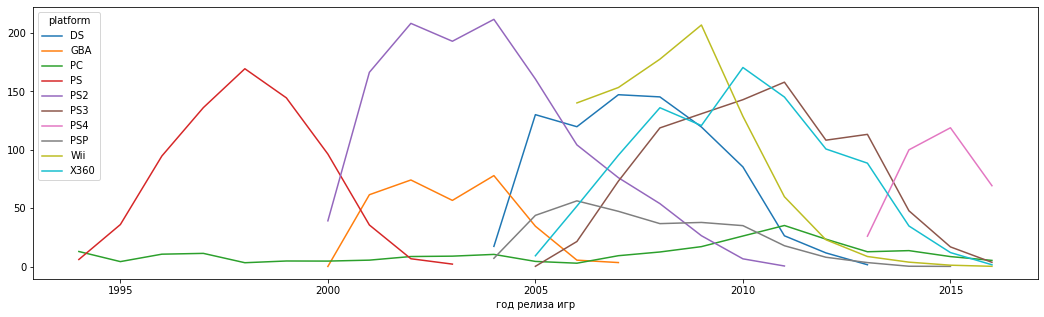

In [42]:
data_test = data.query('year_of_release >= 1994 & platform in @top10_platform')
data_test.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(figsize=(18, 5))
plt.xlabel('год релиза игр')
plt.show()

**Вывод:** Больше всего популярных платформ появилось с 2003 по 2005 годы. Многие платформы уже устарели и не дожили до наших времен

#### Определим срок жизни платформ

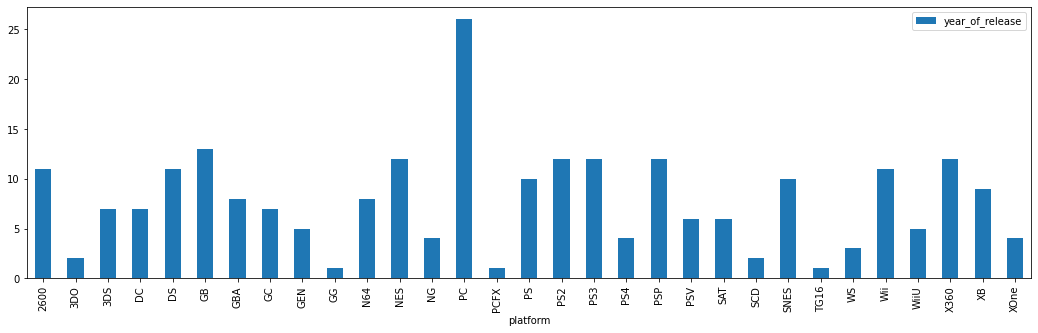

In [43]:
life_platform = (
    data[['year_of_release', 'platform']].drop_duplicates()
    .pivot_table(index='platform', values='year_of_release', aggfunc='count')
)
life_platform.plot(figsize=(18, 5), kind='bar')
plt.show()

PC - это вечное, от выхода первых игр и до сегоднешнего дня, на компьютер стабильно выходят новинки. Для более точного расчета "жизни" платформы исключим исключим PС

In [44]:
life_platform.query('platform != "PC"').describe() 

,year_of_release
count,30.000000
mean,7.200000
std,3.907552
min,1.000000
25%,4.000000
50%,7.000000
75%,11.000000
max,13.000000


**Вывод:** В среднем платформы остаются актуальными 7 лет.

#### Определим как часто появляются платформы

Посчитаем общее количество лет со дня выхода первой платформы

In [45]:
data['year_of_release'].nunique()

37

Посчитаем общее количество палфторм

In [46]:
data['platform'].nunique()

31

Расчет срока выхода платформы

In [47]:
31/37*12

10.054054054054054

**Вывод:** В среднем новая платформа выходит каждые 10 месяцев.

### Определения периода данных для построения прогноза на 2017 год

Возьмем данные с 2014 года. Так как в это года происходит изменение тенденция устаревших и новых платформ.

### Уберем данные до 2014 года из таблицы

In [48]:
data = data.query('year_of_release >= 2014')

### Лидирующие платформы за выбранный период 

In [49]:
print ('Рейтинг платформ с 2006 года:', data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False))

Рейтинг платформ с 2006 года: platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
PC       27.40
PSV      22.40
Wii       5.07
PSP       0.36
Name: sum_sales, dtype: float64


In [50]:
leader_platform = data.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).index.values[:3]
print ('Самые популярный платформы:', leader_platform)

Самые популярный платформы: ['PS4' 'XOne' '3DS']


Построим график для самых популярных платформ и посмотрим ростут у них продажи или снежаются

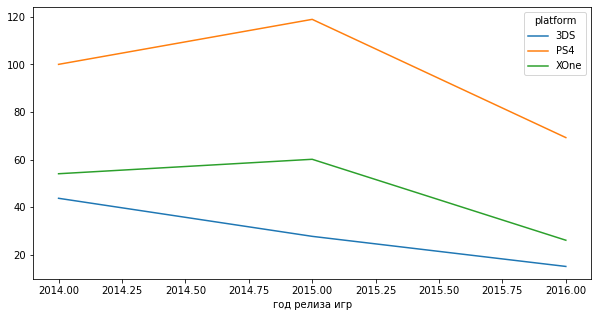

In [51]:
(data.query('platform in @leader_platform')
 .pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(figsize=(10, 5))
)
plt.xlabel('год релиза игр')
plt.show()

**Вывод:** Глядя на график видно, что самые популярный платформы растут, если не брать в внимание 2016 год, т.к. он еще не закончился и нельзя смотреть на него объективно.

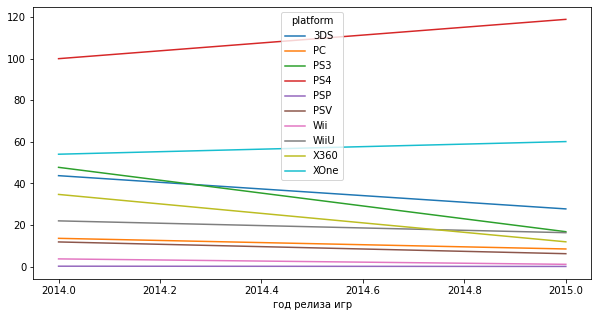

In [52]:
(
    data.query('year_of_release < 2016')
    .pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum').plot(figsize=(10, 5))
)
plt.xlabel('год релиза игр')
plt.show()

**Вывод:** На графике отчетливо видно, что потенциально прибыльные платформы только начали свое развитии и растут, это PS4 и XOne. А вот PS3 и x360 теряют свою былую хватку.

### Построим график "Ящик с усами"

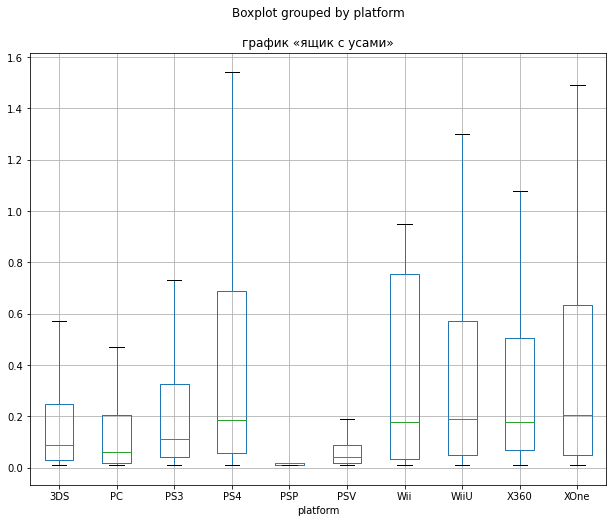

In [53]:
data.boxplot(by='platform', column='sum_sales', figsize=(10,8), showfliers=False)
plt.title('график «ящик с усами»')
plt.show()

**Выаод:** На графике видно, как PS4 и XOne завоёвывает рынок обгоняя всех своих конкурентов. Хотя средние продажи еще равны с Wii, Wiiu, x360. 

Найдем игру на платформе Wii, которая обогнала по продажа все остальные игры

In [54]:
data[data['sum_sales']==data['sum_sales'].max()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63


Игра Call of Duty: Black Ops 3 вышла 2015 году и принесла разработчикам рекордный доход на платформе PS4.

### Проверим гипотезу: как влияют на продажи отзывы пользователей и кртиков

Возьмем самую популярную платформу (PS4) и проверим на ней гипотизу

In [55]:
PS4 = data.query('platform == "PS4"')
PS4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,tbd,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,tbd,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


#### Построим диаграмму рассеяния и посчитает корреляцию для отзывов критиков 

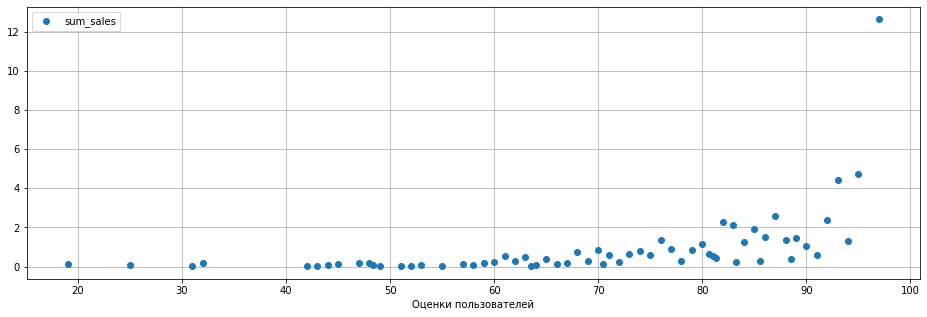

In [56]:
PS4.pivot_table(index='critic_score', values='sum_sales').plot(style='o', grid=True, figsize=(16, 5))
plt.xlabel('Оценки пользователей')
plt.show()

На диаграмме видно, что игры с рейтингом критиков выше 60 лучше продаются нежели, с низкой оценкой. То есть при покупки той или иной игры покупатель читает критиков. А значит есть положительная корреляция.

In [57]:
print ('Уровень кореляции:', PS4.corr().loc['critic_score', 'sum_sales'])

Уровень кореляции: 0.38872605217554984


Корреляция средне положительная

#### Построим диаграмму рассеяния и посчитает корреляцию для отзывов пользователей

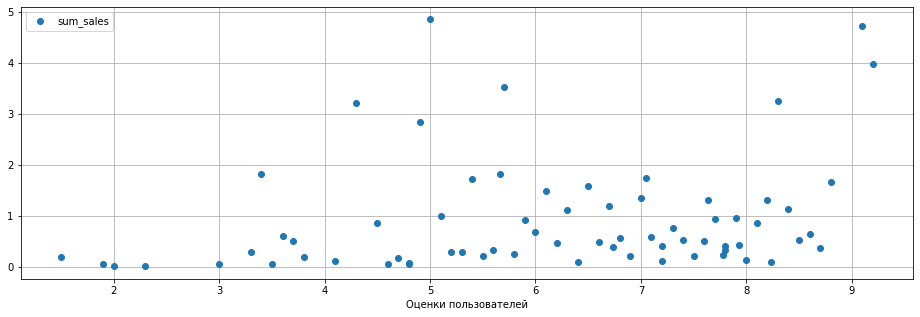

In [58]:
PS4.pivot_table(index='user_score', values='sum_sales').plot(style='o', grid=True, figsize=(16, 5))
plt.xlabel('Оценки пользователей')
plt.show()

На диаграмме видно, что продажи игр от отзывов пользователей никак не зависят.

In [59]:
print ('Уровень кореляции:', PS4.corr().loc['user_score', 'sum_sales'])

Уровень кореляции: -0.025916218803237717


Корреляция очень отрицательная, приближена к нулю

**Вывод:** Отзывы критиков в средней степени влияют на продажи игр. При высоком рейтинге критика, игры больше продаются. Пользовательские отзывы ни как не влияют на продажи.

### Проверим влияние отзывов на продажу игр на остальных платформах

#### Проверка влияния отзывов критиков на продажи

Влияние отзывов критиков на продажи. Платформа: PS4


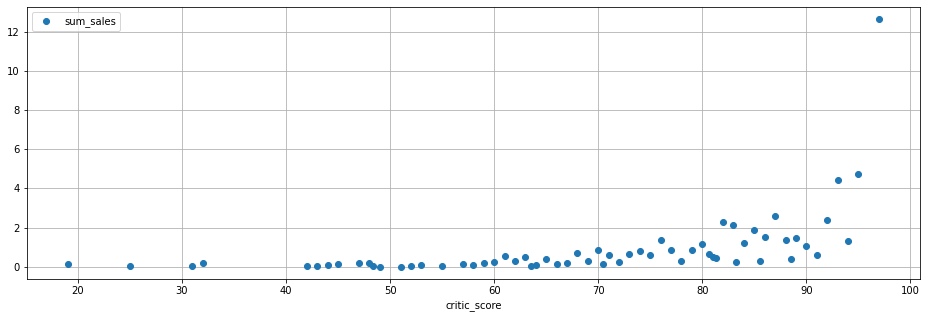

Уровень кореляции: 0.38872605217554984 

Влияние отзывов критиков на продажи. Платформа: 3DS


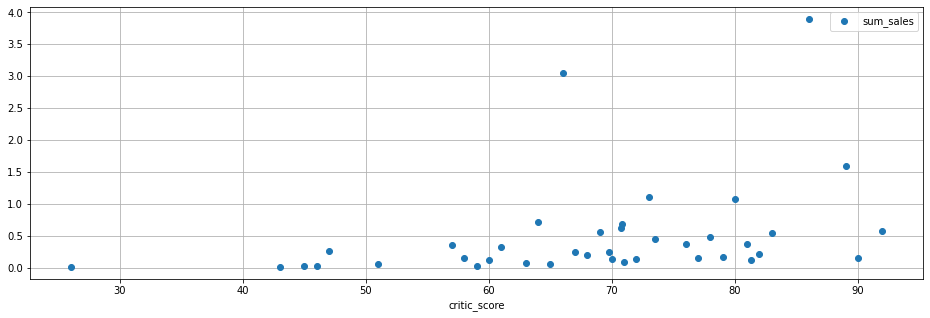

Уровень кореляции: 0.2797680019784932 

Влияние отзывов критиков на продажи. Платформа: XOne


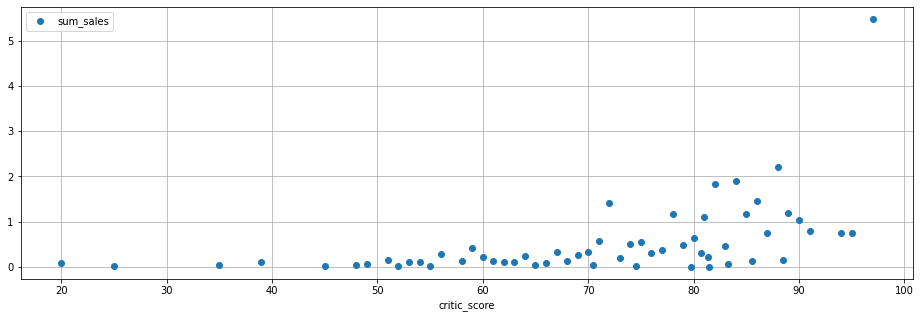

Уровень кореляции: 0.3793472462647462 

Влияние отзывов критиков на продажи. Платформа: WiiU


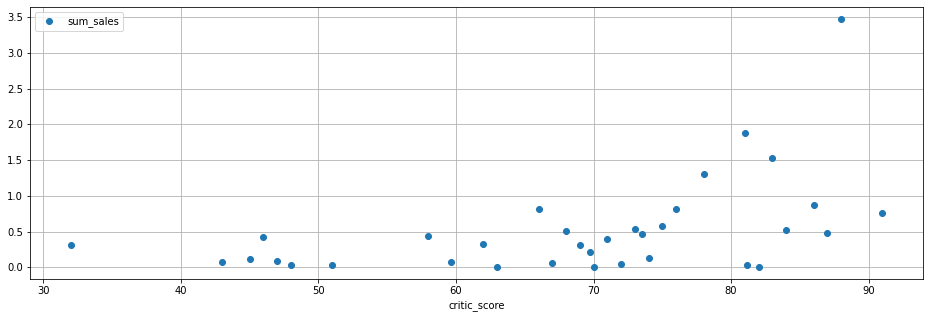

Уровень кореляции: 0.3687712051753812 

Влияние отзывов критиков на продажи. Платформа: PS3


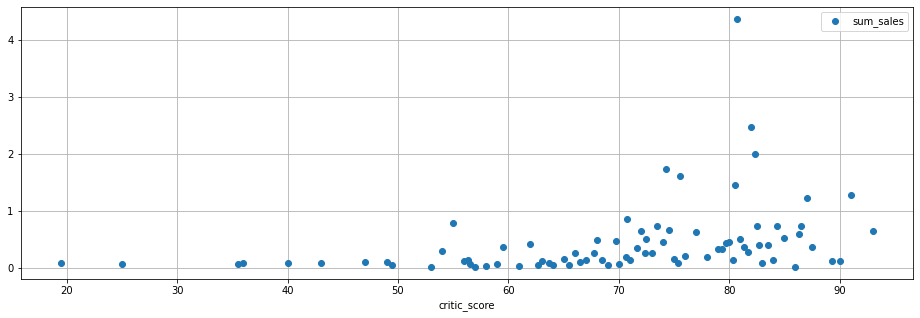

Уровень кореляции: 0.3179716573000383 

Влияние отзывов критиков на продажи. Платформа: X360


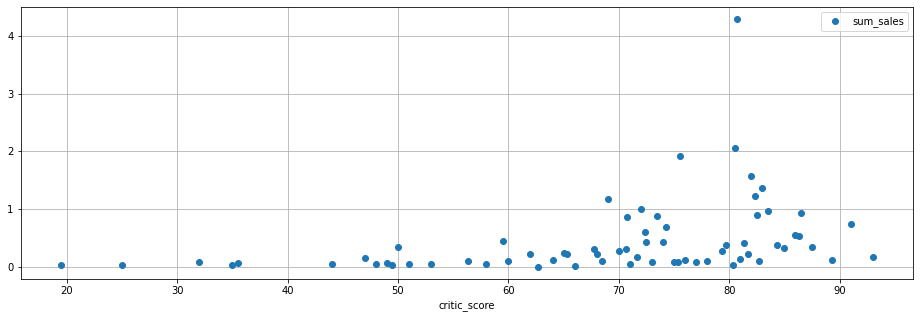

Уровень кореляции: 0.3407643179646823 

Влияние отзывов критиков на продажи. Платформа: PC


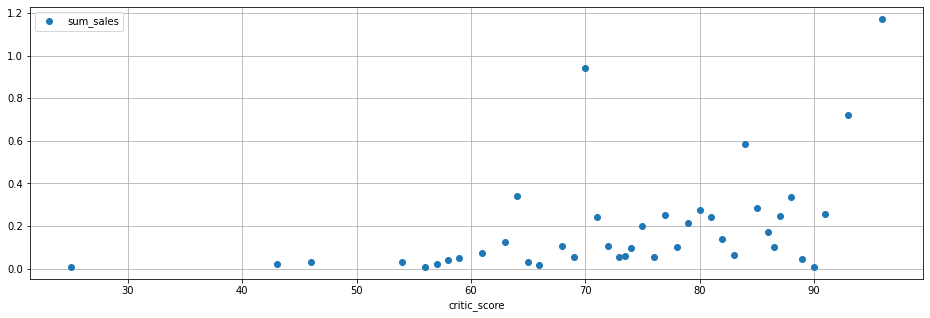

Уровень кореляции: 0.17916070004479212 

Влияние отзывов критиков на продажи. Платформа: Wii


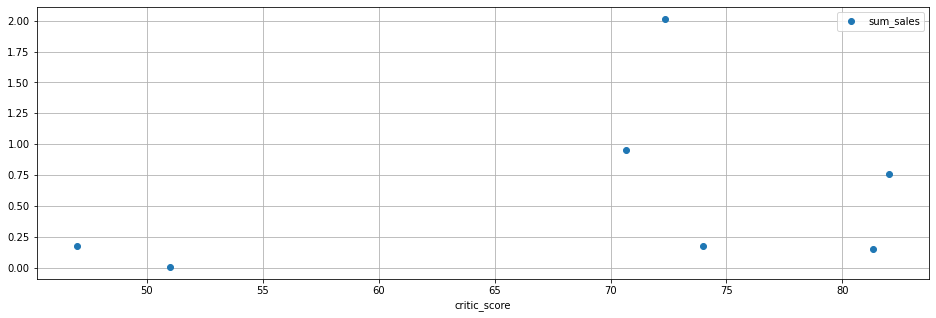

Уровень кореляции: 0.33054100810106024 

Влияние отзывов критиков на продажи. Платформа: PSV


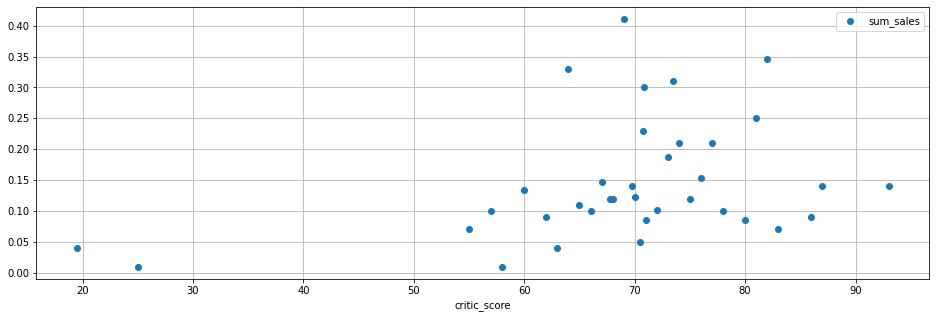

Уровень кореляции: 0.15289155451078704 

Влияние отзывов критиков на продажи. Платформа: PSP


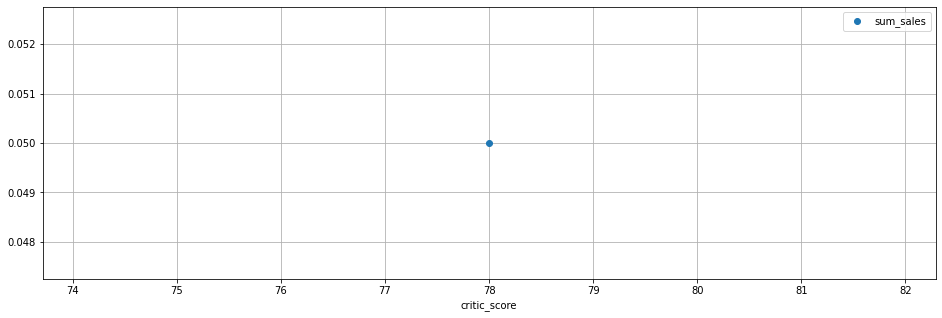

Уровень кореляции: nan 



In [60]:
corr_critic_score = []
platform = data['platform'].unique()
for i in platform:
    print('Влияние отзывов критиков на продажи. Платформа:', i)
    (
        data[data['platform']==i].pivot_table(index='critic_score', values='sum_sales')
        .plot(style='o', grid=True, figsize=(16, 5))
    )
    plt.show()
    corr_critic_score.append(data[data['platform']==i]
               .corr().loc['critic_score', 'sum_sales'])
    (
        print ('Уровень кореляции:', data[data['platform']==i]
               .corr().loc['critic_score', 'sum_sales'], '\n')
    )
    
    
    
                                                                                                

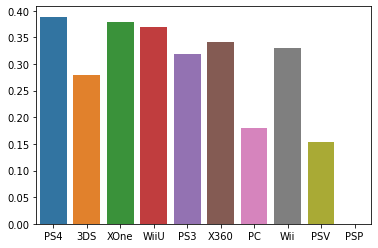

In [61]:
sb.barplot(x=platform, y=corr_critic_score)
plt.show()

**Вывод:** Продажи на большинстве платформах имеют среднею зависимость от отзывов критиков, а значит при высоких оценкам игры на определенных платформах продаются лучше

#### Проверка влияния отзывов Пользователей на продажи

Влияние отзывов пользователей на продажи. Платформа: PS4


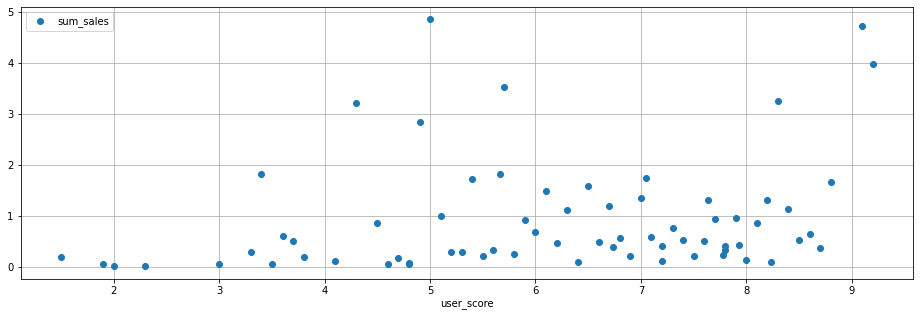

Уровень кореляции: -0.025916218803237717 

Влияние отзывов пользователей на продажи. Платформа: 3DS


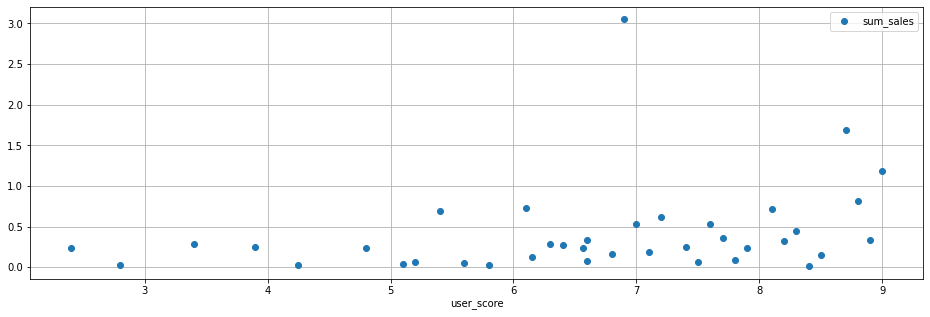

Уровень кореляции: 0.24444173905721855 

Влияние отзывов пользователей на продажи. Платформа: XOne


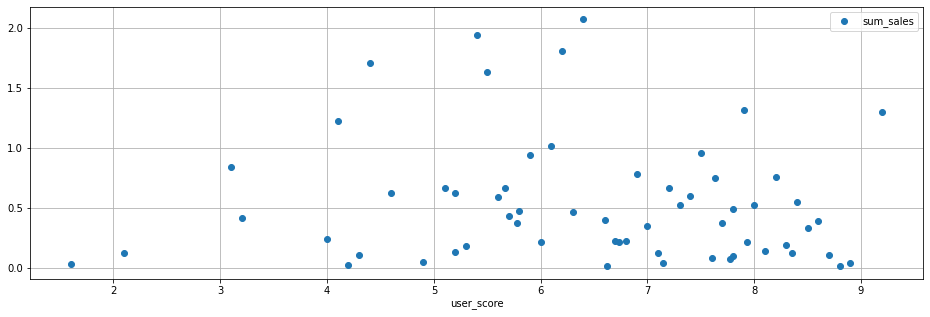

Уровень кореляции: -0.09240594681320165 

Влияние отзывов пользователей на продажи. Платформа: WiiU


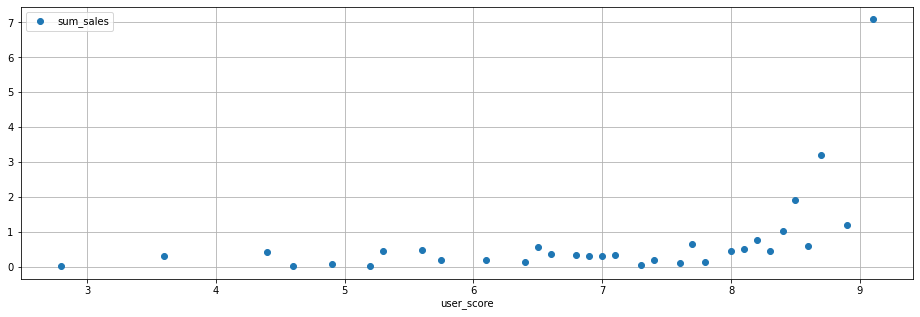

Уровень кореляции: 0.38417865866985146 

Влияние отзывов пользователей на продажи. Платформа: PS3


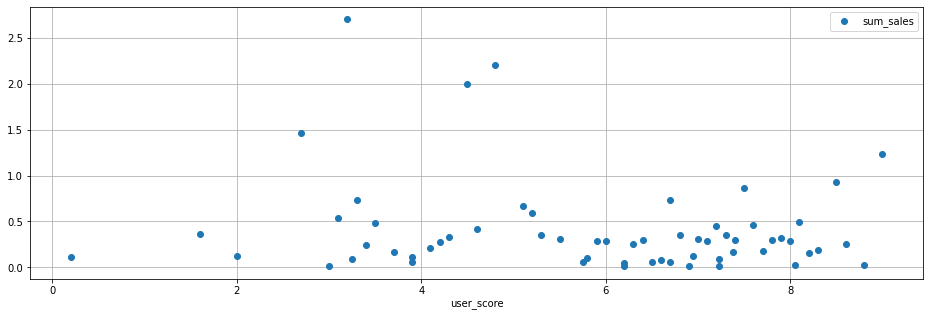

Уровень кореляции: -0.14840710472933608 

Влияние отзывов пользователей на продажи. Платформа: X360


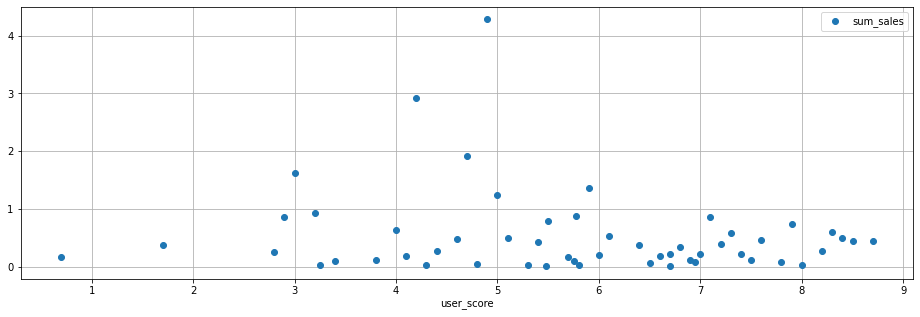

Уровень кореляции: -0.13228485097266054 

Влияние отзывов пользователей на продажи. Платформа: PC


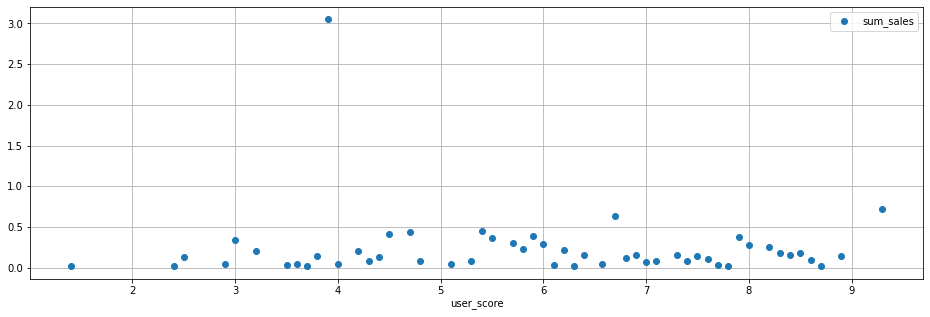

Уровень кореляции: -0.06687452691289028 

Влияние отзывов пользователей на продажи. Платформа: Wii


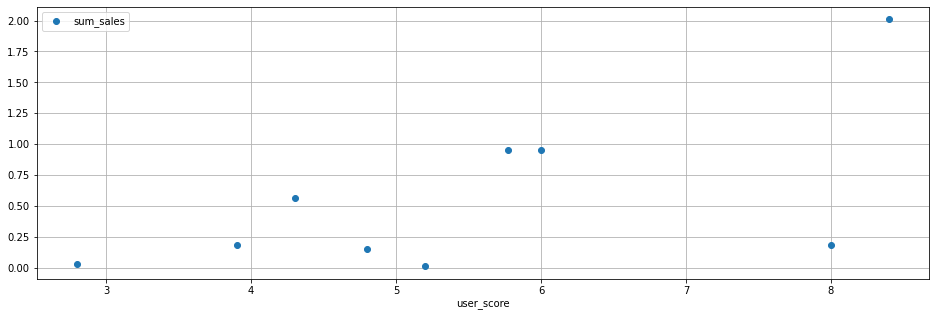

Уровень кореляции: 0.6286911019975764 

Влияние отзывов пользователей на продажи. Платформа: PSV


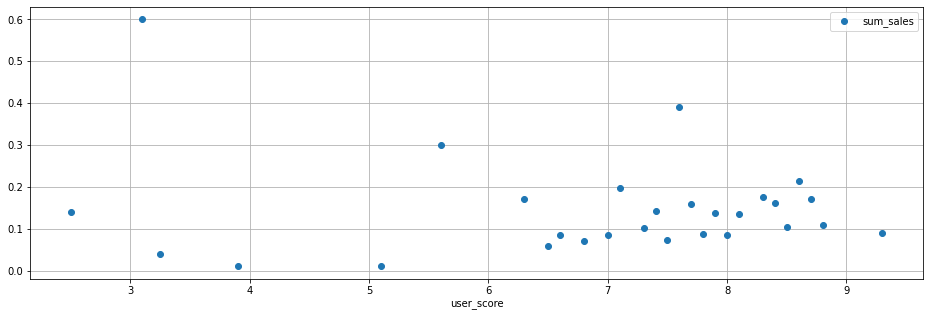

Уровень кореляции: -0.05620980023655717 

Влияние отзывов пользователей на продажи. Платформа: PSP


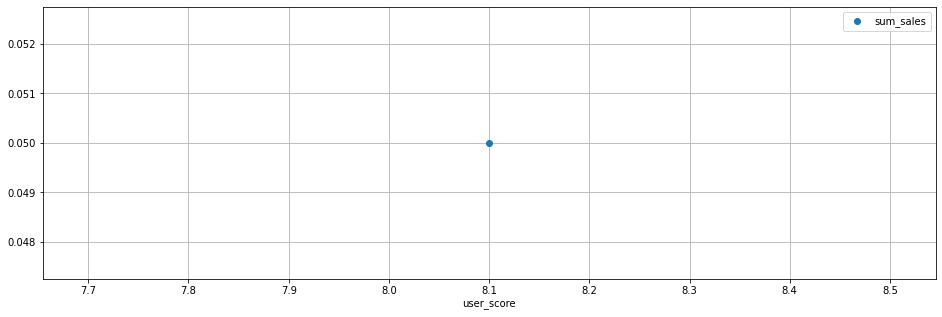

Уровень кореляции: nan 



In [62]:
corr_user_score = []
platform = data['platform'].unique()
for i in platform:
    print('Влияние отзывов пользователей на продажи. Платформа:', i)
    (
        data[data['platform']==i].pivot_table(index='user_score', values='sum_sales')
        .plot(style='o', grid=True, figsize=(16, 5))
    )
    plt.show()
    corr_user_score.append(data[data['platform']==i]
               .corr().loc['user_score', 'sum_sales'])
    (
        print ('Уровень кореляции:', data[data['platform']==i]
               .corr().loc['user_score', 'sum_sales'], '\n')
    )
    
    

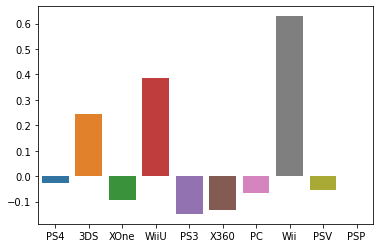

In [63]:
sb.barplot(x=platform, y=corr_user_score)
plt.show()

**Вывод:** Продажи на большинстве платформах не имеют ни какой зависимости от отзывов пользователей. Только на двух платформах прослеживается средняя зависимость от отзывов пользователей.

### Посмотрим на распредиление игр по жанрам

#### Найдем самые прибыльные жанры

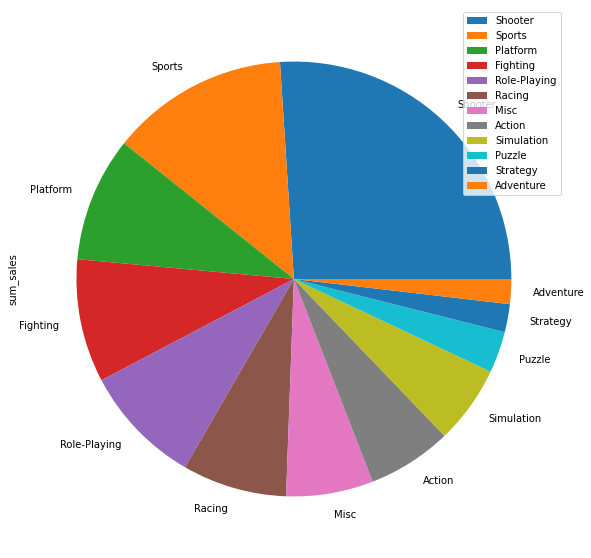

In [64]:
(
    data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'mean')
    .sort_values(ascending=False, by = 'sum_sales')
    .plot(kind='pie', figsize=(10,10), y= 'sum_sales')
)
plt.show()

In [65]:
data.pivot_table(index = 'genre', values = 'sum_sales', aggfunc = 'mean').sort_values(ascending=False, by = 'sum_sales')

,sum_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322113
Simulation,0.298409


**Вывод:** Самые стабильные продажи в жанре Shooter и на втором месте спорт Sports. Самые не стабильные продажи с высоким уровнем провалов — это жанр Adventure.

## Построим портрет пользователя каждого региона

### Определим портрет пользователя для Северной Америке

#### Использование платформ

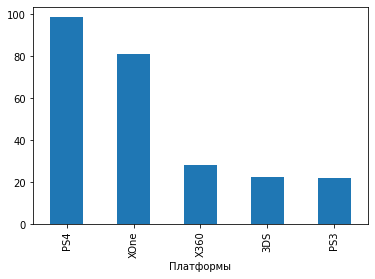

In [66]:
na_platform = data.groupby('platform')['na_sales'].sum().sort_values(ascending=False)[:5]
na_platform.plot(kind = 'bar')
plt.xlabel('Платформы')
plt.show()

#### Рейтинг жанров

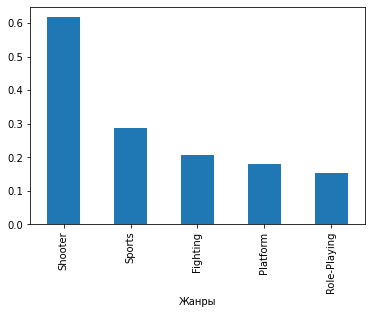

In [67]:
na_genre = data.groupby('genre')['na_sales'].mean().sort_values(ascending=False)[:5]
na_genre.plot(kind = 'bar')
plt.xlabel('Жанры')
plt.show()

#### Определим влияние рейтинга ESRB

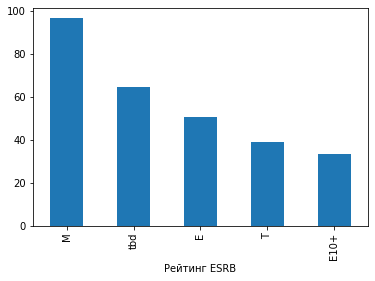

In [68]:
na_rating = data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
na_rating.plot(kind = 'bar')
plt.xlabel('Рейтинг ESRB')
plt.show()

#### Вывод

Пользователь из Северной Америки больше всего предпочитает платформы PS4 и XOne. Самые предпочтительный жанр Shooter. Рейтинг ESRB влияет на продажи.

### Определим портрет пользователя для Европы

#### Использование платформ

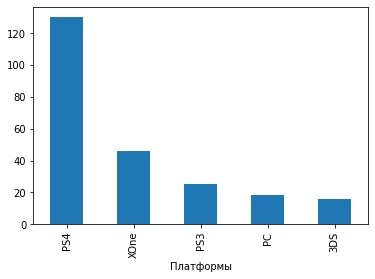

In [69]:
eu_platform = data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)[:5]
eu_platform.plot(kind = 'bar')
plt.xlabel('Платформы')
plt.show()


#### Рейтинг жанров

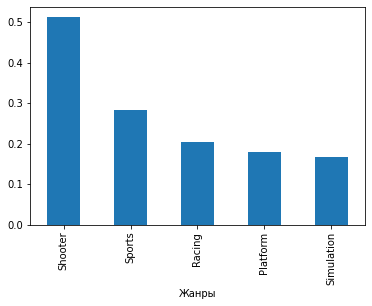

In [70]:
eu_genre = data.groupby('genre')['eu_sales'].mean().sort_values(ascending=False)[:5]
eu_genre.plot(kind = 'bar')
plt.xlabel('Жанры')
plt.show()

#### Определим влияние рейтинга ESRB

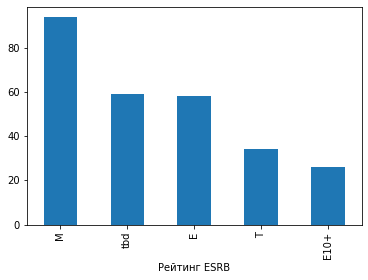

In [71]:
eu_rating = data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
eu_rating.plot(kind = 'bar')
plt.xlabel('Рейтинг ESRB')
plt.show()

#### Вывод

Пользователь из Европы больше всего предпочитает платформу PS4. Самые предпочтительные жанры Shooter. Рейтинг ESRB влияет на продажи.

### Определим портрет пользователя для Японии

#### Использование платформ

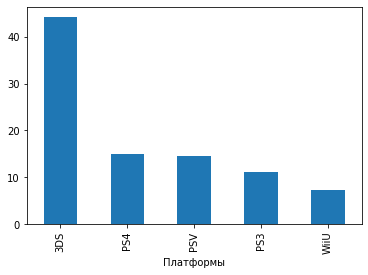

In [72]:
jp_platform = data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)[:5]
jp_platform.plot(kind = 'bar')
plt.xlabel('Платформы')
plt.show()

#### Рейтинг жанров

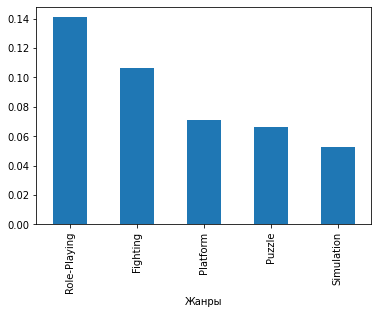

In [73]:
jp_genre = data.groupby('genre')['jp_sales'].mean().sort_values(ascending=False)[:5]
jp_genre.plot(kind = 'bar')
plt.xlabel('Жанры')
plt.show()

#### Определим влияние рейтинга ESRB

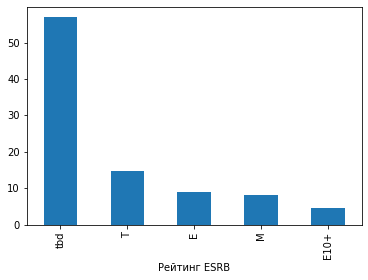

In [74]:
jp_rating = data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
jp_rating.plot(kind = 'bar')
plt.xlabel('Рейтинг ESRB')
plt.show()

#### Вывод

Пользователь из Японии больше всего предпочитает платформу 3DS, портативную приставку, выпущенную в Японии. Самые предпочтительные жанры Role-Playing и Fighting. Рейтинг ESRB на продажи не влияют.

### Сравнение партретов пользователей каждых регионов

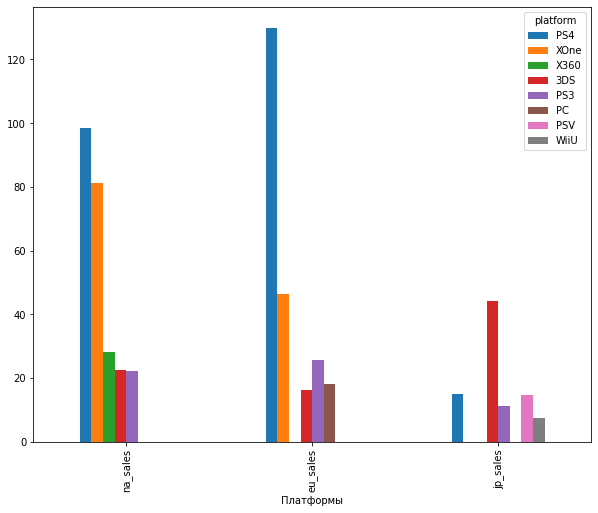

In [75]:
top_platform = pd.DataFrame(data=[na_platform, eu_platform, jp_platform])
top_platform.plot(kind='bar',figsize=(10,8))
plt.xlabel('Платформы')
plt.show()

**Вывод:** Американский рынок разделился на два лагеря, кто то предпочитает PS4, но и любители XOne не отстают. На Европейском рынки есть явный фаворит, это PS4. Азиатский рынок отличается от всех, там совсем нет интереса к американским платформам Microsoft. А наибольшую популярность завоевала портативная приставка местного производства 3DS.

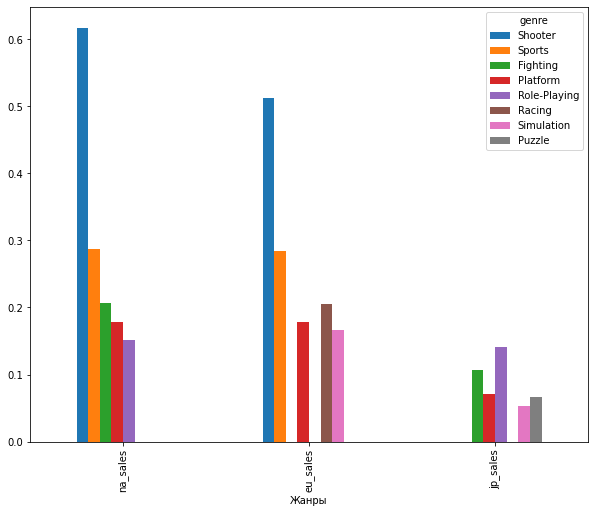

In [76]:
top_genre = pd.DataFrame(data=[na_genre, eu_genre, jp_genre])
top_genre.plot(kind='bar',figsize=(10,8))
plt.xlabel('Жанры')
plt.show()

**Вывод:** Вкусы к жанрам у Американского и Европейского рынка примерно одинаковые, на первом месте у них Shooter а на втором Sprots. В Японии пользователи предпочитают жанр - Role-Playing.

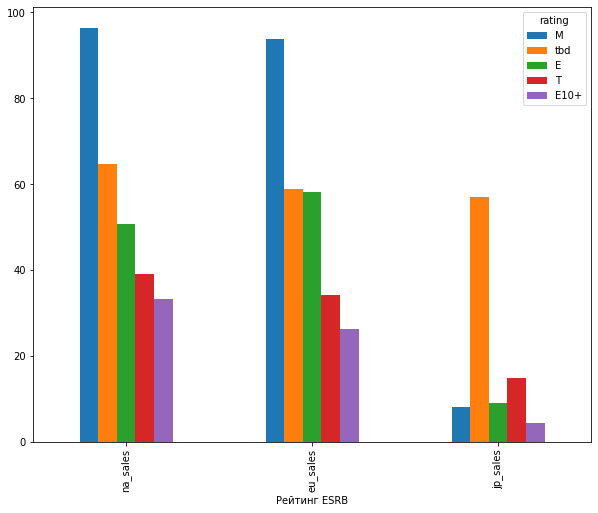

In [77]:
top_rating = pd.DataFrame(data=[na_rating, eu_rating, jp_rating])
top_rating.plot(kind='bar',figsize=(10,8))
plt.xlabel('Рейтинг ESRB')
plt.show()

**Вывод:** Американский и Европейские рынки схожи, и рейтинг ESRB в этих регионах влияет на продажи. В Японии этот рейтинг не играет никакой роли на продажи игр.

## Проверка гипотиз

Для сравнения двух средних значений будем использовать t-test.

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

In [87]:
xone = data[(data['platform'] == 'XOne') &  (data['user_score'] > 0)]['user_score']
pc = data[(data['platform'] == 'PC') &  (data['user_score'] > 0)]['user_score']
print ('Средние пользовательские рейтинги платформ Xbox One:', xone.mean())
print ('Средние пользовательские рейтинги платформ PC:', pc.mean())

Средние пользовательские рейтинги платформ Xbox One: 6.675352733686067
Средние пользовательские рейтинги платформ PC: 6.318279569892471


**H0**: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H1**: Средние пользовательские рейтинги платформ Xbox One и PC разные

In [88]:
alpha = .05

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.05143173216209671
Не получилось отвергнуть нулевую гипотезу


**Вывод:** Гипотеза не подтвердилась. Средние пользовательские рейтинги платформ Xbox One и PC разные.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [89]:
action = data[(data['genre'] == 'Action') &  (data['user_score'] > 0)]['user_score']
sports = data[(data['genre'] == 'Sports') &  (data['user_score'] > 0)]['user_score']
print ('Средние пользовательские рейтинги жанра Action:', action.mean())
print ('Средние пользовательские рейтинги жанра Sports:', sports.mean())

Средние пользовательские рейтинги жанра Action: 6.7939655172413795
Средние пользовательские рейтинги жанра Sports: 5.186971830985915


**H0**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

**H1**: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [90]:
alpha = .05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 5.678941212504337e-18
Отвергаем нулевую гипотезу


**Вывод:** Гипотеза подтвердилась. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

## Вывод

При первоначальном анализе данных были выявлены проблемы с пропущенными строками, неверными типами данных. очень много пропусков в рейтингах от пользователей и критиков. Причины могут быть разные.
При обработке данных были удалены строки с пропущенными значениями в имени игр и годе выхода. В итоге было удалено около 1% данных, что является хорошим результатом.

В разных регионах предпочтения к приставкам и жанрам разные. Ниже опишем какие игры к каким приставкам будут продавятся.

Портреты пользователей составлены:
1. Северная Америка:

Самые популярные платформы: PS4, XOne, X360, 3DS, PS3.

Самые популярные жанры (ТОП-5): Shooter, Sports, Fighting, Platform, Role-Playing     

В это регионе рейтинг ESRB - **Влияет**

2. Европа:

Самые популярные платформы: PS4, XOne, PS3, PC, 3DS.

Самые популярные жанры (ТОП-5): Shooter, Sports, Racing, Platform, Simulation    

В это регионе рейтинг ESRB - **Влияет**

3. Япония:

Самые популярные платформы: 3DS, PS4, PSV, PS3, WiiU

Самые популярные жанры (ТОП-5): Role-Playing, Fighting, Platform, Puzzle, Simulation   

В это регионе рейтинг ESRB - **Не влияет**

Пользователи Северной Америки предпочитают больше всего предпочитают PS4 и Xone. У Европейский пользователей с большим отрывом лидирует приставка PS4. В Японии со значительным отрывом лидирует портативная платформа, местного производится. И совсем не интересны платформы созданные в Северной Америки.  По жанрам вкусы у Американских и Европейских пользователей схожи, так в обоих регионах в лидерах жанр - Shooter.
В Японии предпочтения, отличаются от других регионов, большой интерес у Японского пользователя привлек жанр - Role-Playing.

Проверка гипотез:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза не подтвердилась. Пользовательские рейтингри платформ разные.

2. Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. 

Гипотеза подтвердилась. пользовательские рейтинги жанров Action и Sports разные.
   
